Version 1: Convergence achieved.
Vector is
[0.9, 0.530315483506425, 0.523598825952711, 0.523598775598298]
Version 2: Convergence achieved.
Vector is
[0.9, 2.85678681217821, 2.62038345924328, 2.61799388026796, 2.61799387799149]


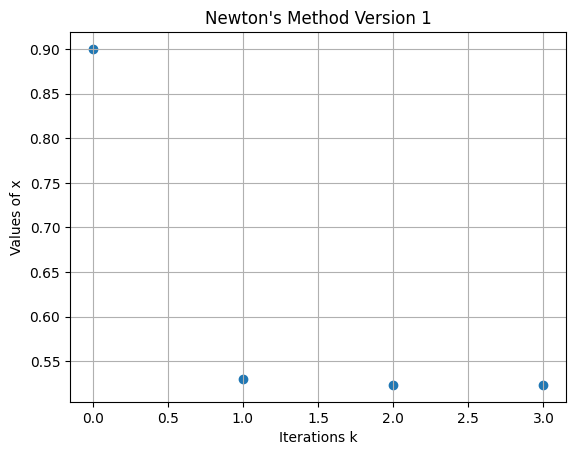

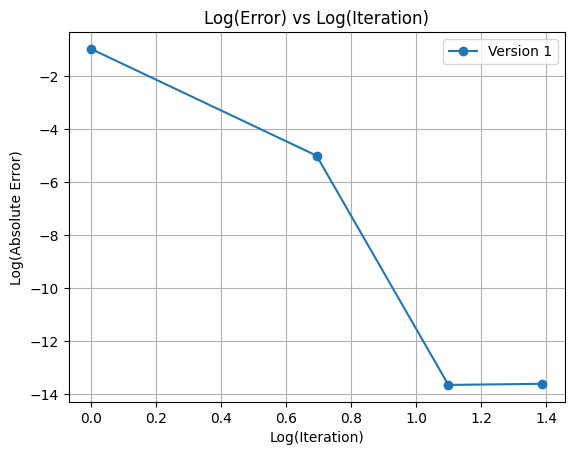

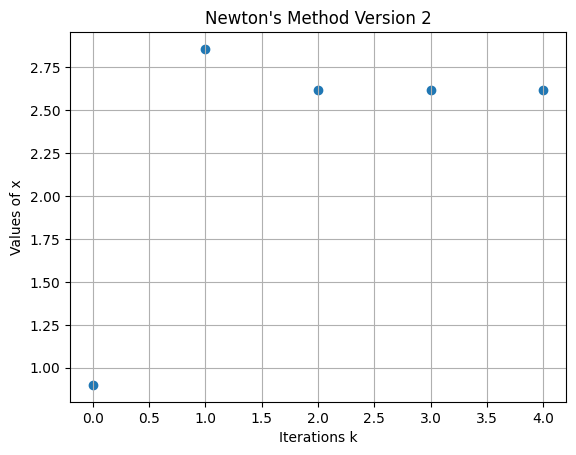

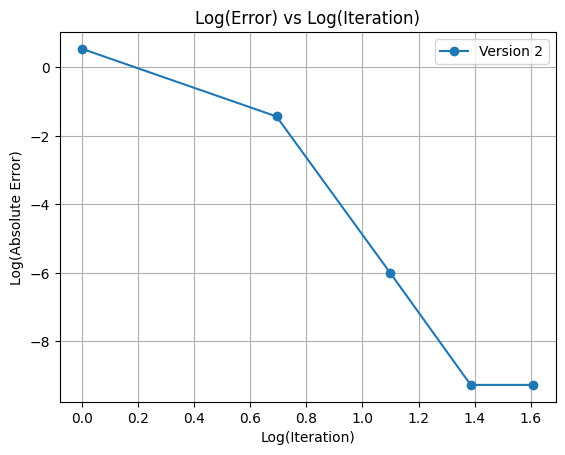

In [139]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt


def NewtonMethod2_version1(f, f_dot, f_double_dot, x0_1):

    # Define number of iterations     
    x_values = [x0_1]

    i = 0
    max_iterations = 30
    flag1 = 0 # flag turns to 1 only if convergence is achieved

    while (i < max_iterations):
        delta = f_dot.subs(x, x_values[i])**2 - 2 * f_double_dot.subs(x, x_values[i]) * f.subs(x, x_values[i])

        if delta < 0:
            print("Version 1: Discriminant is negative, process is terminated")
            print(i)
            break
        elif f_double_dot.subs(x, x_values[i]) == 0:
            print("Version 1: Denominator is zero, process is terminated")
            break
        else:
            var1 = -(f_dot.subs(x, x_values[i]) - x_values[i] * f_double_dot.subs(x, x_values[i]))
            var2 = math.sqrt(f_dot.subs(x, x_values[i])**2 - 2 * f_double_dot.subs(x, x_values[i]) * f.subs(x, x_values[i]))
            var3 = f_double_dot.subs(x, x_values[i])
  
            x_values.append((var1 + var2)/var3)
                
            i = i + 1

            # Check Convergence
            e = 0.0001
            if (abs(x_values[i] - x_values[i - 1]) <= e):
                print("Version 1: Convergence achieved.")
                print("Vector is")
                print(x_values)
                flag1 = 1
                break
    return x_values, flag1

def NewtonMethod2_version2(f, f_dot, f_double_dot, x0_2):

    # Define number of iterations     
    x_values = [x0_2]

    i = 0
    max_iterations = 30
    flag2 = 0 # flag turns to 1 only if convergence is achieved 

    while (i < max_iterations):
        delta = f_dot.subs(x, x_values[i])**2 - 2 * f_double_dot.subs(x, x_values[i]) * f.subs(x, x_values[i])

        if delta < 0:
            print("Version 2: Discriminant is negative, process is terminated")
            break
        elif f_double_dot.subs(x, x_values[i]) == 0:
            print("Version 2: Denominator is zero, process is terminated")
            break
        else:
            var1 = -(f_dot.subs(x, x_values[i]) - x_values[i] * f_double_dot.subs(x, x_values[i]))
            var2 = math.sqrt(f_dot.subs(x, x_values[i])**2 - 2 * f_double_dot.subs(x, x_values[i]) * f.subs(x, x_values[i]))
            var3 = f_double_dot.subs(x, x_values[i])
  
            x_values.append((var1 - var2)/var3)
                
            i = i + 1

            # Check Convergence
            e = 0.0001
            if (abs(x_values[i] - x_values[i - 1]) <= e):
                print("Version 2: Convergence achieved.")
                print("Vector is")
                print(x_values)
                flag2 = 1
                break
    return x_values, flag2


# Define the Variable and the Function
x = sp.Symbol('x')
#f = x**2 + 3*x - 8
f = x**2 + 19*x - 8
#f = x**2 - 4
f = sp.sin(x) - 0.5 
#f = sp.exp(x) - 2
#f = sp.cos(x) - 0.5
x0_1 = 0.9
x0_2 = 0.9

# Calculate Derivative
f_dot = sp.diff(f, x)

# Calculate Second Derivative
f_double_dot = sp.diff(f_dot, x)

# This version is for the plus sign
first, flag1 = NewtonMethod2_version1(f, f_dot, f_double_dot, x0_1) 

#This version is for the minus sign
second, flag2 = NewtonMethod2_version2(f, f_dot, f_double_dot, x0_2) 

# Define Solution
solution1 = 0.5236
solution2 = 2.6179

# Calculate Error
error1 = np.abs(np.array(first) - solution1)
error2 = np.abs(np.array(second) - solution2)

# Calculate the iterations
iterations1 = np.arange(1, len(first) + 1)
iterations2 = np.arange(1, len(second) + 1)

# Convert iterations to float
iterations_float1 = np.array(iterations1, dtype=float)
iterations_float2 = np.array(iterations2, dtype=float)

# Convert error to float
error_float1 = np.array(error1, dtype=float)
error_float2 = np.array(error2, dtype=float)


# Solution Plots
if flag1 == 1:
    iterations1 = range(len(first))

    plt.scatter(iterations1, first, label='x')
    plt.xlabel('Iterations k')
    plt.ylabel('Values of x')
    plt.title('Newton\'s Method Version 1')
    plt.grid(True)
    plt.show()

    # Logarithmic Plots
    plt.plot(np.log(iterations_float1), np.log(error_float1), marker='o', linestyle='-', label='Version 1')
    plt.title('Log(Error) vs Log(Iteration)')
    plt.xlabel('Log(Iteration)')
    plt.ylabel('Log(Absolute Error)')
    plt.grid(True)
    plt.legend()
    plt.show()


if flag2 == 1:
    iterations2 = range(len(second))

    plt.scatter(iterations2, second, label='x')
    plt.xlabel('Iterations k')
    plt.ylabel('Values of x')
    plt.title('Newton\'s Method Version 2')
    plt.grid(True)
    plt.show()

    # Logarithmic Plot
    plt.plot(np.log(iterations_float2), np.log(error_float2), marker='o', linestyle='-', label='Version 2')
    plt.title('Log(Error) vs Log(Iteration)')
    plt.xlabel('Log(Iteration)')
    plt.ylabel('Log(Absolute Error)')
    plt.grid(True)
    plt.legend()
    plt.show()
